## 1. Load Model
Load the CNN model with trained weight and bias from the .pt file.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from PIL import Image
from matplotlib import pyplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# CNN class
class CNN(nn.Module):
     # Initialization
    def __init__(self):
        super (CNN, self).__init__()
        
        self.conv1_out_np = np.zeros((1, 3, 24, 24))
        self.mp1_out_np = np.zeros((1, 3, 12, 12))
        self.conv2_out_np = np.zeros((1, 3, 8, 8))
        self.mp2_out_np = np.zeros((1, 3, 4, 4))
        self.fc_in_np = np.zeros((1, 48))
        self.fc_out_np = np.zeros((1, 10))
        
        # 1st Convolution Layer
        # Image Input Shape -> (28, 28, 1)
        # Convolution Layer -> (24, 24, 3)
        # Pooling Max Layer -> (12, 12, 3)
        self.conv1 = nn.Conv2d(1, 3, kernel_size=5)
        
        # 2nd Convolution Layer
        # Image Input Shape -> (12, 12, 3)
        # Convolution Layer -> (8, 8, 3)
        # pooling Max Layer -> (4, 4, 3)
        self.conv2 = nn.Conv2d(3, 3, kernel_size=5)
        
        # Max Pooling Layer
        self.mp = nn.MaxPool2d(2)
        
        # Fully Connected Layer
        # Num of Weight = 480
        self.fc_1 = nn.Linear(48, 10)
        
    def forward(self, x):
        in_size = x.size(0)
        
        # Layer Integration
        x = self.conv1(x)
        self.conv1_out_np = x.detach().numpy()
        
        x = F.relu(self.mp(x))
        self.mp1_out_np = x.detach().numpy()

        x = self.conv2(x)
        self.conv2_out_np = x.detach().numpy()
        
        x = F.relu(self.mp(x))
        self.mp2_out_np = x.detach().numpy()
        
        # Flatten Layer
        x = x.view(in_size, -1)
        self.fc_in_np = x.detach().numpy()
        
        # Fully Connected Layer
        x = self.fc_1(x)
        self.fc_out_np = x.detach().numpy()
        
        return F.log_softmax(x)

In [4]:
# Load model
model = torch.load("./cnn_mnist.pt", weights_only=False)
model.eval()
print(model)

CNN(
  (conv1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_1): Linear(in_features=48, out_features=10, bias=True)
)


## 2. Testing using Bitmap Image
Test the model to classify a digit from .bmp image.

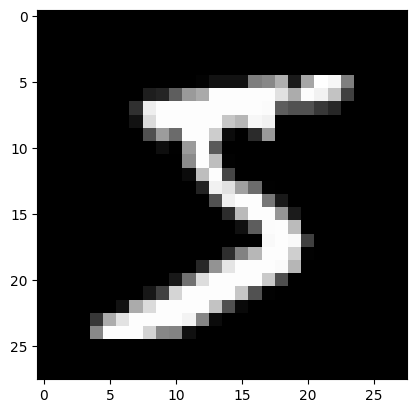

In [5]:
# Load bitmap image
img = Image.open("./bmp/train_0.bmp", "r")
np_img = np.array(img)
pyplot.imshow(np_img, cmap=pyplot.get_cmap('gray'))

In [6]:
np_img_re = np.reshape(np_img, (1,1,28,28))    
# 0 - 255 => 0 - 1 로 정규화, np.array => tensor 변환
data = Variable(torch.tensor((np_img_re / 255), dtype = torch.float32))
    
# Output of feedforwarding
output = model(data)
pred = output.data.max(1, keepdim=True)[1]
print('Predicted output: ' + ', '.join(map(str, pred.flatten().tolist())))

Predicted output: 5


## 3. Testing using Base64 Image
Test the model to classify a digit from a Base64-encoded image.

In [7]:
import re
import base64
import io

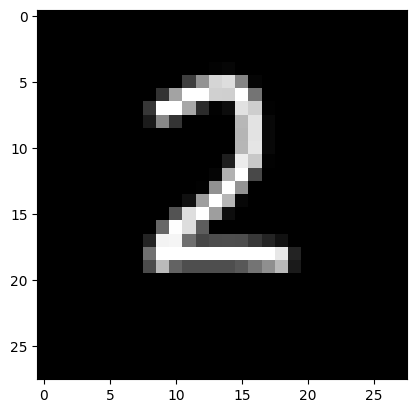

In [8]:
# Base64 of digit "2"
base64str = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARgAAAEYCAYAAACHjumMAAAAAXNSR0IArs4c6QAAFQlJREFUeF7tnXvMLlV1h3+radMqF1uLIgIJVrDUinLTNoZiAloTRIoF2qTF3otUgUqUP+wFlTamqad4qYDUhLReGiNgg9Tai3groSEiaLG2VrRRqihQBaXE0D9WZ7fvRw6Hc873rpm9ZvbM+0xC/OOsvfbez9p5fL+ZPXtMXBCAAASSCFhSXtJCAAIQEIJhEUAAAmkEEEwaWhJDAAIIhjUAAQikEUAwaWhJDAEIIBjWAAQgkEYAwaShJTEEIIBgWAMQgEAaAQSThpbEEIAAgmENQAACaQQQTBpaEkMAAgiGNQABCKQRQDBpaEkMAQggGNYABCCQRgDBpKElMQQggGBYAxCAQBoBBJOGlsQQgACCYQ1AAAJpBBBMGloSQwACCIY1AAEIpBFAMGloSQwBCCAY1gAEIJBGAMGkoSUxBCCAYFgDEIBAGgEEk4aWxBCAAIJhDUAAAmkEEEwaWhJDAAIIhjUAAQikEUAwaWhJDAEIIBjWAAQgkEYAwaShJTEEIIBgWAMQgEAaAQSThpbEEIAAgmENQAACaQQQTBpaEkMAAgiGNQABCKQRQDBpaEkMAQggGNYABCCQRgDBpKElMQQggGBYAxCAQBoBBJOGlsQQgACCYQ1AAAJpBBBMGloSQwACCIY1AAEIpBFAMGloSQwBCCAY1gAEIJBGAMGkoSUxBCCAYFgDEIBAGgEEk4aWxBCAAIJhDUAAAmkEEEwa2mUkdvd9JR0r6ZmSDtjLrL4u6WYzu20ZM2cWNQggmBoUZ57D3Q+W9FxJh0raX1JZF0dIOk7S04LT+7akqyVda2YfCrYlfGEEEMzCChqZjrsfKOliSS+PtAvE3i3pjWa2I9CG0AURQDALKua6U3H3Y1a/Tv5Y0g+t225g3N9K+kUz++bAPDSfEQEEM6NiDRmqu58i6UxJZ6z+DBqSrm/bOySdZGZ39k1Au3kRQDDzqtdao93lnsozJpbKrmP+D0knmNnX1poMQbMmgGBmXb5HDn51T+W1kn6r8Wl92Mxe0PgYGV4FAgimAsQWUrj7L0t604j3VIZO+y8lvcLM7huaiPbtEkAw7dZmrZG5+1GS3iDp1LUatBX0VUmnmdmtbQ2L0dQigGBqkRw5j7uX/SpXSPqFkbuu3d03JD2bG7+1sbaRD8G0UYfQKNz9ZElvl3R4qGG7wdeY2VntDo+R9SWAYPqSm6Cdu5fHzOU+yyETdJ/d5dPN7F+zOyH/uAQQzLi8e/Xm7j8o6TpJJ/ZKMI9G5U+l8vi67JXhWggBBNN4Id39eZJeI+mFjQ+1xvC+IOloM3uwRjJyTE8AwUxfg0eNYLXr9uckvWTCXbdTkdlhZhdN1Tn91iWAYOry7J3N3Z8oqexluVDSQb0T5TQs90bKMQzlzxffTRendX/Clfebal2HmFl5hM01cwIIpoECuvvZkt7a0Ca5b0n6w25vzS3dPpVbzeyB7TC5e3mZsdafcX/avRR5wXZ98u/tE0AwE9ao0U1yl0u6xMzKTde1L3cvT7bKhrknrN1oz4H3mdlYb3lXGC4p9kQAwUywNlbvDL1F0s9P0P1Wl+VgqPdL+nL3Z9n9ksobzjcNeQnR3X+iO7jq7yvdN/ppM/uHCfnQdQUCCKYCxEiKif8c2pLK+7JOm3P3J0kqYihvcQ+5zjeztw1JQNvpCSCYkWrg7uU826skvXikLnfuptxTOdfM3jdG3+5ejtv8RLfbuMim7/V6M3td38a0a4MAghmhDqs/iT4q6cdG6G7XLt4r6ZXReypDx+nu5Szfjw+QzHVmdvrQcdB+WgIIJpm/u5dHzkUuP5rc1a7pyw3XXzGz20fu9+Hu3L08cr90QP/7m9l3BrSn6cQEEExyAdz9Xd3+kfIYeqyrPP0pm9UmP2jb3X+2fF1gwMRfaGblpjHXTAkgmMTCufsPSLq3O1l/n8Rudk7d1J8VqyMlyhOqvlf50648beOaKQEEk1g4dy87XMtLimNcZZftcWZWnhQ1c3VfMCjzLxz6XFea2bl9GtKmDQIIJrEO7v5SSe9M7KKkvmu1C/jy1uRSBufuvyTpL3oyKPdfDjCzh3q2p9nEBBBMYgFW5+T+eUIXn5P0sXLz2MyuSchfLWWFG71suKtWjfETIZhE5u5+vKRPVuqi7LotvwT+yczuqZQzPU2FG71suEuvUl4HCCaP7f9ldvevrL753Len8iXEC8zsPX0TTNnO3csN7v+S9P09x8GGu57gWmiGYJKr4O6XSPr9nt1Mskmu51j32Kz7ENw7JP1Gz7wIpie4FpohmOQqrDba3STpsEBXfy3pd6bcJBcY67ah7l62/JcPwvW5EEwfao20QTAjFMLdi1xulHTwNt2VPSPnmdm7RxjWaF0gmNFQN9cRghmpJO6+n6Ty2Pq8PbyT1OsclpGGP6gbBDMI36wbI5gJyrc6N+XY1Q7fch5LOYdlsUdEIpgJFlkjXSKYRgqx5GEgmCVXd+9zQzCbW/vRZo5gRkPdXEcIprmSLG9ACGZ5NV13RghmXVLE9SaAYHqjm31DBDP7ErY/AQTTfo2yRohgssiS92ECCGZzFwOC2dzajzZzBDMa6uY6QjDNlWR5A0Iwy6vpujNCMOuSIq43AQTTG93sGyKY2Zew/QkgmPZrlDVCBJNFlrzc5GUNCMGwCNIJ8AsmHXGzHSCYZkuznIEhmOXUMjoTBBMlRnyYAIIJI1tMAwSzmFK2OxEE025tskeGYLIJk78cfM6RmRu6DhDMhhZ+zGkjmDFpt9UXgmmrHoscDYJZZFnXmhSCWQsTQUMIIJgh9ObdFsHMu36zGD2CmUWZUgaJYFKwknRnAghmc9cDgtnc2o82cwQzGurmOkIwzZVkeQNCMMur6bozQjDrkiKuNwF3v17SqT0T8OnYnuBaaIZgWqjCgsfg7vtK+s6AKV5kZjsGtKfphAQQzITwN6Frdz9F0gcHzPVnzOwDA9rTdEICCGZC+Evv2t2f3P1pdIukgwbMdT8ze2BAe5pOSADBTAh/6V27+z9KOmHAPK83s9MGtKfpxAQQzMQFWGr37n6upCsGzu9CM3vzwBw0n5AAgpkQ/lK7dvenSLpd0j4D53i6mV03MAfNJySAYCaEv9Su3f2Tko4fOL//7n4BHWhm5X+5ZkoAwcy0cK0O291f242tnP8y9HqbmZ0/NAntpyWAYKblv6je3f17JN0nab+BE3tI0mFmdtfAPDSfmACCmbgAS+re3a+UdE6FOe3o/jS6qEIeUkxMAMFMXICldL/asXu3pMcMnNMXJB1tZg8OzEPzBgggmAaKsIQhuPvZkt41cC5lQ90xZnbHwDw0b4QAgmmkEHMeRqUduwXBOWb2jjmzYOyPJIBgWBGDCbj7DZJOGpjow2b2goE5aN4YAQTTWEHmNBx3f5Kkt0o6a+C4vyvpCDP7z4F5aN4YAQTTWEHmMhx3/0lJfydp/wpj5qlRBYgtpkAwLVal8TG5+8GSPi3pgApD/XT3OsAxFfKQokECCKbBorQ+pEr3XLamebaZvaf1OTO+fgQQTD9uG9uq0lvSW/zKrt9DeN9oucsJwSy3ttVn5u6Hr/40GvqW9NbYLjazP6g+UBI2QwDBNFOKtgfi7k+VdKOk8uSoxvVZMzuqRiJytEsAwbRbm2ZG5u6PlfQpSUdWGlTZsVteB/hipXykaZQAgmm0MC0Nq3vPqJzq/6qKY2LHbkWYLadCMC1Xp4Gxufshku6sOJQbzOz5FfORqmECCKbh4kw9NHc/U9KbypOeSmP5hqTjzOyrlfKRpnECCKbxAk0xPHf/EUlXSXpexf7vl3SymZV7OVwbQgDBbEihI9N095slPSfSZpvYqyWdb2blFwzXBhFAMBtU7HWm6u6/uvr1sk74OjHcc1mH0kJjEMxCC9tnWu5eztL9UqV3jMoQypm6x5vZ1/qMhzbzJ4Bg5l/DKjNw91dLKv8dWCWh9HVJJ5pZOQKTa0MJIJgNLfzWtFc7dK+V9KzKKI40s89Xzkm6mRFAMDMrWM3hrt4tKt+PrrX9f2t4l5nZeTXHSq55EkAw86zb4FGvHkXfVPFPoq0x8U2jwdVZTgIEs5xarj2TxF8uZQyXmFn5uiMXBIRgNmwRuPsR3QHdn0j4s6iQ/IiZnbxhSJnuXgggmA1aHslyKU+Nnmlm92wQUqa6DQEEsyFLxN2fJunjCb9cytccL5N0eXdj994Nwck01ySAYNYENeew1VcXy0uLNQ7p3hUFp9LNeXEkjx3BJAOeMr27P3G17f9FSePgVLoksEtJi2CWUsld5uHuR0v6gKRDk6ZY7rmcwKl0SXQXkhbBLKSQW9Nw93LObXlMfEbi1G6TdKaZlfeWuCCwRwIIZgGLY/UhtGdI+s1ksZTjFspXGMsRmlwQ2JYAgtkWUbsB7l5eTHydpHOTR3mrpN8zsw8l90P6hRFAMDMt6OrJ0Fu6j88/PnkK5VfLc/lzKJnyQtMjmJkVdoQnQzsT4ciFma2P1oaLYFqryF7Gs3qH6COJT4aQy4zWwxyGimDmUKXusVDyNv9dKfDLZSbrovVhIpjWK/T/cjl79fmQjJ24yGUGa2CuQ0QwDVdutaflDZJOHWmYX+m+P/18jrkcifYGdINgGixy96nWfcvLg5JeOuLwru++4PjrvA09IvEN6ArBNFbk1b2Wv5F0+EhD+5akC8zs3SP1RzcbRADBNFTs5JPmdjfTf5P0Iva4NLQIFjYUBNNIQVfntZQ/U8q5LWNc75T0CjN7YIzO6GMzCSCYBuru7uUb0Nd1T4oeN8Jw/qq8DGlmt4/QF11sOAEEM/ECSPia4u5m5N1xlu+X9HrEMnHBN6x7BDNxwd39UkkXJg7jmtVJ//xiSYRM6t0TQDATrozVE6N/TxjCFyX9tqSPmtmDCflJCYG1CCCYtTDVD0rc+s82//rlImNPAgimJ7ghzdz9yd3u3FskHTQkz27alp24J5vZHZXzkg4CvQggmF7YhjVy9xu6j5+dNCzLo1qzE7cyUNINJ4BghjMMZXD3l3XfJnp7qNHeg9mJWxEmqeoSQDB1ee412+q+Szkwe59K3b5X0ivNrJw6xwWB5gggmJFK4u5P7d5UvrHilxV/18zKm9ZcEGiWAIIZoTTu/r2SPlW+3Vypu/IO0bPM7KFK+UgDgRQCCCYF6yOTunv5TlE5/b/GVUT1YjO7q0YyckAgkwCCyaS7yu3u35a0X4Wuyi+XY8zsuxVykQIC6QQQTDJidy8fRKuxTb9soPsp9rgkF4z0VQkgmKo4H53M3c/pNtRdWaGbKyTdXSFPKynulfQZSf9sZve3MijGUZcAgqnL81HZ3L0cw3BacjdzT39Vd1znnbtM4j5JnytP3nifar7lRTCJtVsdxVDuv3ANI3D1SjbbZeFX0XaERv53BJMI3N1PkfTBxC5IvWcCW7+KkM6EqwTBJMJ391d3u3bfmNgFqWME/qQ7IrTUhGskAggmEbS7X9bdmH15YhekjhMo+4jOMLMvx5vSIkoAwUSJrRnv7oeVJySV9r+s2SthaxK4xcyevWYsYQMIIJgB8PbW1N3L4dqnJ6Un7XACvMs1nOG2GRDMtojiAe7+FElfirekxYgEvmlmPzxifxvZFYJJKLu7nympPFrlapvAkWb2+baHOO/RIZiE+rn7qyTtSEhNyroEyre4y+NsriQCCCYBrLuXN6fLG9RcbRMo34mq9ZZ72zOdaHQIJgE8gkmAmpMSweRwfTgrgkkAXPEFx4TRkXInAi8zsz+DSB4BBJPA1t2fI+nmhNSkrEvgeDMrG++4kgggmASw7v4YSbW/qFjeLP6YpHsShjxWykMl/dpYnW3Xj3U3YLaL4d+HEQDwMH57bO3ub159vrVPDzu/PfwvRSxmNmexPMzA3R9XzhOWdLSkx+8GztMlndUHWrDNDjO7KNiG8CABBBMEFgnv9sN8ttsP8+OBNuXn+ombfv6Juz9W0gkrdkVIe7v6/Cq6zcyODdSF0J4EEExPcOs0W+3ovbaco7tG/K3dCW8vMbPy+VeuAIGdfhVdXD6du01TOAfYDg1FMEMJbtPe3b9P0h9JulDS7ni7pEslvcbM/id5OItOvw1rOE9QfQQzEvSd/l/2KElPWJ2vWw4D/4yZcepdxTrswrqIBc4V+UZSIZgILWIhAIEQAQQTwkUwBCAQIYBgIrSIhQAEQgQQTAgXwRCAQIQAgonQIhYCEAgRQDAhXARDAAIRAggmQotYCEAgRADBhHARDAEIRAggmAgtYiEAgRABBBPCRTAEIBAhgGAitIiFAARCBBBMCBfBEIBAhACCidAiFgIQCBFAMCFcBEMAAhECCCZCi1gIQCBEAMGEcBEMAQhECCCYCC1iIQCBEAEEE8JFMAQgECGAYCK0iIUABEIEEEwIF8EQgECEAIKJ0CIWAhAIEUAwIVwEQwACEQIIJkKLWAhAIEQAwYRwEQwBCEQIIJgILWIhAIEQAQQTwkUwBCAQIYBgIrSIhQAEQgQQTAgXwRCAQIQAgonQIhYCEAgRQDAhXARDAAIRAggmQotYCEAgRADBhHARDAEIRAggmAgtYiEAgRABBBPCRTAEIBAhgGAitIiFAARCBBBMCBfBEIBAhACCidAiFgIQCBFAMCFcBEMAAhECCCZCi1gIQCBEAMGEcBEMAQhECCCYCC1iIQCBEAEEE8JFMAQgECGAYCK0iIUABEIEEEwIF8EQgECEAIKJ0CIWAhAIEUAwIVwEQwACEQIIJkKLWAhAIEQAwYRwEQwBCEQIIJgILWIhAIEQAQQTwkUwBCAQIYBgIrSIhQAEQgQQTAgXwRCAQIQAgonQIhYCEAgRQDAhXARDAAIRAggmQotYCEAgRADBhHARDAEIRAggmAgtYiEAgRABBBPCRTAEIBAhgGAitIiFAARCBBBMCBfBEIBAhACCidAiFgIQCBFAMCFcBEMAAhECCCZCi1gIQCBEAMGEcBEMAQhECCCYCC1iIQCBEAEEE8JFMAQgECGAYCK0iIUABEIEEEwIF8EQgECEAIKJ0CIWAhAIEUAwIVwEQwACEQIIJkKLWAhAIEQAwYRwEQwBCEQIIJgILWIhAIEQAQQTwkUwBCAQIYBgIrSIhQAEQgQQTAgXwRCAQIQAgonQIhYCEAgRQDAhXARDAAIRAggmQotYCEAgRADBhHARDAEIRAggmAgtYiEAgRABBBPCRTAEIBAh8L9Xj9NGwsdk2QAAAABJRU5ErkJggg=='
imgstr = re.search(r'base64,(.*)', str(base64str)).group(1)
file = io.BytesIO(base64.b64decode(imgstr));
img = Image.open(file).convert("L")
img = img.resize((28, 28))
im2arr = np.array(img)
pyplot.imshow(im2arr, cmap=pyplot.get_cmap('gray'))

In [9]:
im2arr = im2arr.reshape(1, 1, 28, 28)
# 0 - 255 => 0 - 1 로 정규화, np.array => tensor 변환
data = Variable(torch.tensor((im2arr / 255), dtype = torch.float32))

# Output of feedforwarding
output = model(data)
pred = output.data.max(1, keepdim=True)[1]
print('Predicted output: ' + ', '.join(map(str, pred.flatten().tolist())))

Predicted output: 2
